# IS 362 - Week 12 Assignment

## Objective
The objective of this assignment is to practice preparing data for donwstream analysis. For this task the Mushroom dataset from the UC Irvine data repository was used. A subset of columns was selected, followed by data cleaning and transformation. Then preliminary exploratory anlysis was performed to uncover initial insights.

## Load Data and Create DataFrame
The data was loaded, columns were named, a subset of the columns was selected and read into pandas and a DataFrame was created. 

In [149]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# load the data
file_path = '/home/lb24370531/IS 362/mushroom/agaricus-lepiota.data' 

columns = [
    'class', 'cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor', 'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color', 'stalk_shape', 'stalk_root', 'stalk_surface_above_ring', 'stalk_surface_below_ring', 'stalk_color_above_ring','stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number', 'ring_type', 'spore_print_color', 'population', 'habitat', 
]

# create DataFrame
mushrooms = pd.read_csv(file_path, names=columns, usecols=['class', 'cap_shape', 'cap_color', 'odor', 'habitat'])

# print DataFrame
mushrooms


,class,cap_shape,cap_color,odor,habitat
0,p,x,n,p,u
1,e,x,y,a,g
2,e,b,w,l,m
3,p,x,w,p,u
4,e,x,g,n,g
...,...,...,...,...,...
8119,e,k,n,n,l
8120,e,x,n,n,l
8121,e,f,n,n,l
8122,p,k,n,y,l


## Clean Data
The data was cleaned partially cleaned when loading the data. The data was cleaned further by checking data types, and cheicking for missing data.

In [150]:
# check data types
mushrooms.dtypes

class        object
cap_shape    object
cap_color    object
odor         object
habitat      object
dtype: object

In [151]:
# check for missing data
mushrooms.isnull().sum()

class        0
cap_shape    0
cap_color    0
odor         0
habitat      0
dtype: int64

In [152]:
# replace codes with numeric values 
# class: e=0, p=1
class_replacements = {'e': 0, 'p': 1}
mushrooms['class'] = mushrooms['class'].replace(class_replacements)

# cap_shape: b=0, c=1,x=2, f=3,k=4,s=5
cap_shape_replacements = {'b': 0, 'c': 1, 'x': 2, 'f': 3, 'k': 4, 's': 5}
mushrooms['cap_shape'] = mushrooms['cap_shape'].replace(cap_shape_replacements)

# cap_color: n=0, b=1,c=2, g=3, r=4, p=5, u=6, e=7 w=8, y=9
cap_color_replacements = {'n': 0, 'b': 1, 'c': 2, 'g': 3, 'r': 4, 'p': 5, 'u': 6, 'e': 7, 'w': 8, 'y': 9}
mushrooms['cap_color'] = mushrooms['cap_color'].replace(cap_color_replacements)

# odor: a=0, l=1, c=2, y=3, f=4, m=5, n=6, p=7, s=8
odor_replacements = {'a': 0, 'l': 1, 'c': 2, 'y': 3, 'f': 4, 'm': 5, 'n': 6, 'p': 7, 's': 8}
mushrooms['odor'] = mushrooms['odor'].replace(odor_replacements)

# habitat: g=0, l=1, m=2, p=3, u=4, w=5, d=6
habitat_replacements = {'g': 0, 'l': 1, 'm': 2, 'p': 3, 'u': 4, 'w': 5, 'd': 6}
mushrooms['habitat'] = mushrooms['habitat'].replace(habitat_replacements)

# print DataFrame
mushrooms

,class,cap_shape,cap_color,odor,habitat
0,1,2,0,7,4
1,0,2,9,0,0
2,0,0,8,1,2
3,1,2,8,7,4
4,0,2,3,6,0
...,...,...,...,...,...
8119,0,4,0,6,1
8120,0,2,0,6,1
8121,0,3,0,6,1
8122,1,4,0,3,1


## Eploratory Data Analysis

### Vizualization of the Class Distribution

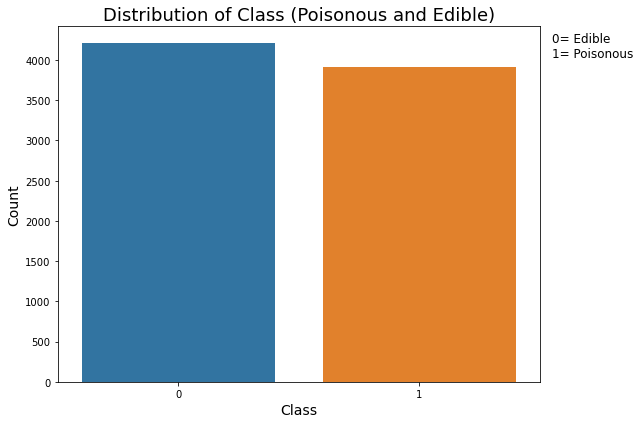

In [153]:
plt.figure(figsize=(9, 6))
sns.countplot(data=mushrooms, x='class')
plt.title('Distribution of Class (Poisonous and Edible)', fontsize=18)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Class', fontsize=14)
plt.text(1.55, 4350, '0= Edible\n1= Poisonous', fontsize=12, va='top')
plt.tight_layout()
plt.show()

### Vizualization of the DIstribution for Cap Shape

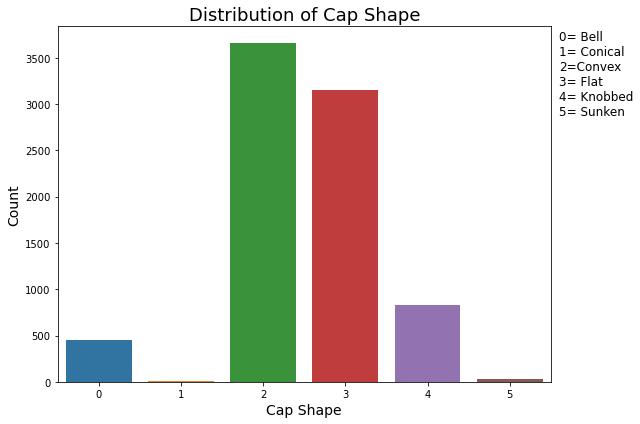

In [154]:
plt.figure(figsize=(9, 6))
sns.countplot(data=mushrooms, x='cap_shape')
plt.title('Distribution of Cap Shape', fontsize=18)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Cap Shape', fontsize=14)
plt.text(5.6, 3800, '0= Bell\n1= Conical\n2=Convex\n3= Flat\n4= Knobbed\n5= Sunken', fontsize=12, va='top')
plt.tight_layout()
plt.show()

### Vizualization of the DIstribution for Cap Color

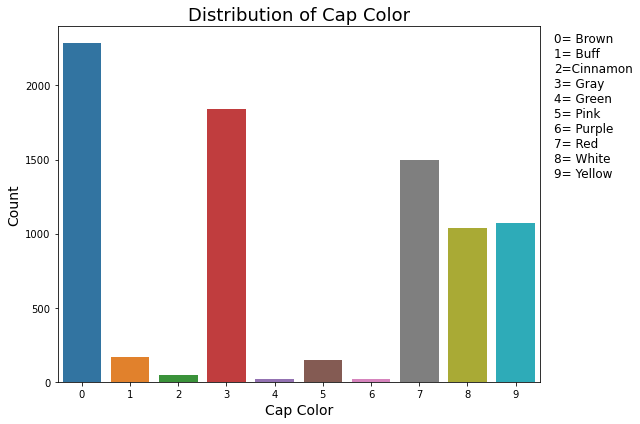

In [155]:
plt.figure(figsize=(9, 6))
sns.countplot(data=mushrooms, x='cap_color')
plt.title('Distribution of Cap Color', fontsize=18)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Cap Color', fontsize=14)
plt.text(9.8, 2360, '0= Brown\n1= Buff\n2=Cinnamon\n3= Gray\n4= Green\n5= Pink\n6= Purple\n7= Red\n8= White\n9= Yellow', fontsize=12, va='top')
plt.tight_layout()
plt.show()

### Vizualization of the DIstribution for Odor

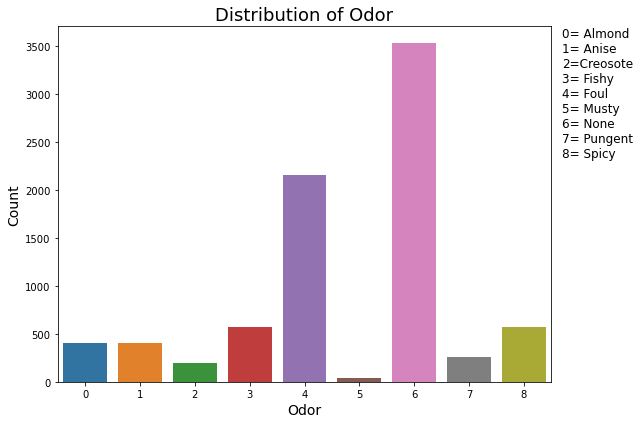

In [156]:
plt.figure(figsize=(9, 6))
sns.countplot(data=mushrooms, x='odor')
plt.title('Distribution of Odor', fontsize=18)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Odor', fontsize=14)
plt.text(8.7, 3700, '0= Almond\n1= Anise\n2=Creosote\n3= Fishy\n4= Foul\n5= Musty\n6= None\n7= Pungent\n8= Spicy', fontsize=12, va='top')
plt.tight_layout()
plt.show()

### Vizualization of the DIstribution for Habitat

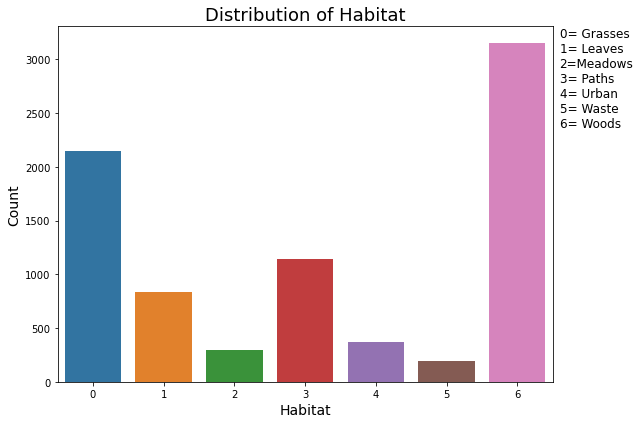

In [157]:
plt.figure(figsize=(9, 6))
sns.countplot(data=mushrooms, x='habitat')
plt.title('Distribution of Habitat', fontsize=18)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Habitat', fontsize=14)
plt.text(6.6, 3300, '0= Grasses\n1= Leaves\n2=Meadows\n3= Paths\n4= Urban\n5= Waste\n6= Woods', fontsize=12, va='top')
plt.tight_layout()
plt.show()

### Vizualization of the Relationship Between Class (Edible/Poisonous) and Odor

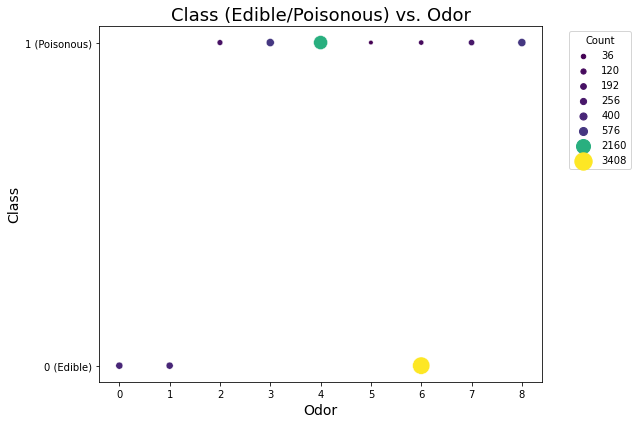

In [159]:
count_mushrooms_1 = mushrooms.groupby(['class', 'odor']).size().reset_index(name='count')
plt.figure(figsize=(9, 6))
sns.scatterplot(data=count_mushrooms_1, x='odor', y='class', size='count', hue='count', sizes=(20, 300), palette='viridis', legend='full')
plt.title('Class (Edible/Poisonous) vs. Odor', fontsize=18)
plt.ylabel('Class', fontsize=14)
plt.xlabel('Odor', fontsize=14)
plt.legend(title='Count', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.yticks([0, 1], ['0 (Edible)', '1 (Poisonous)'])
plt.tight_layout()
plt.show()

### Vizualization of the Relationship Between Class (Edible/Poisonous) and Cap Shape

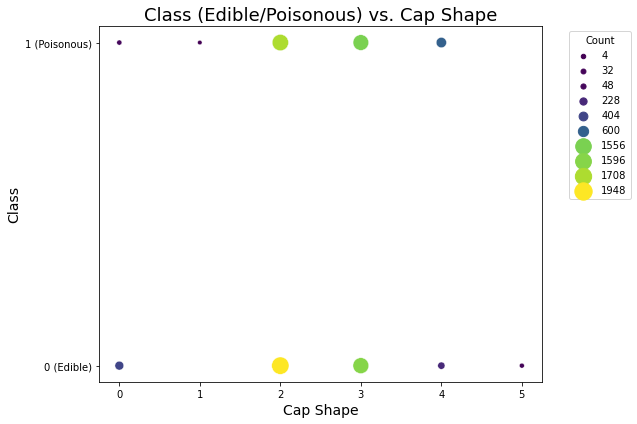

In [160]:
count_mushrooms_2 = mushrooms.groupby(['class', 'cap_shape']).size().reset_index(name='count')
plt.figure(figsize=(9, 6))
sns.scatterplot(data=count_mushrooms_2, x='cap_shape', y='class', size='count', hue='count', sizes=(20, 300), palette='viridis', legend='full')
plt.title('Class (Edible/Poisonous) vs. Cap Shape', fontsize=18)
plt.ylabel('Class', fontsize=14)
plt.xlabel('Cap Shape', fontsize=14)
plt.legend(title='Count', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.yticks([0, 1], ['0 (Edible)', '1 (Poisonous)'])
plt.tight_layout()
plt.show()

### Vizualization of the Relationship Between Class (Edible/Poisonous) and Cap Color

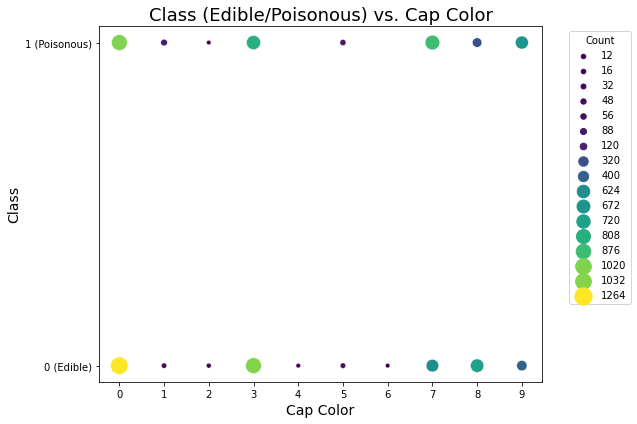

In [161]:
count_mushrooms_3 = mushrooms.groupby(['class', 'cap_color']).size().reset_index(name='count')
plt.figure(figsize=(9, 6))
sns.scatterplot(data=count_mushrooms_3, x='cap_color', y='class', size='count', hue='count', sizes=(20, 300), palette='viridis', legend='full')
plt.title('Class (Edible/Poisonous) vs. Cap Color', fontsize=18)
plt.ylabel('Class', fontsize=14)
plt.xlabel('Cap Color', fontsize=14)
plt.legend(title='Count', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.yticks([0, 1], ['0 (Edible)', '1 (Poisonous)'])
plt.xticks(range(10))
plt.tight_layout()
plt.show()

### Vizualization of the Relationship Between Class (Edible/Poisonous) and Habitat

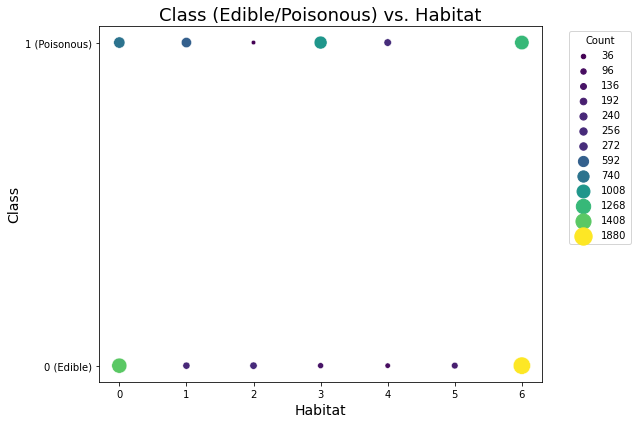

In [162]:
count_mushrooms_4 = mushrooms.groupby(['class', 'habitat']).size().reset_index(name='count')
plt.figure(figsize=(9, 6))
sns.scatterplot(data=count_mushrooms_4, x='habitat', y='class', size='count', hue='count', sizes=(20, 300), palette='viridis', legend='full')
plt.title('Class (Edible/Poisonous) vs. Habitat', fontsize=18)
plt.ylabel('Class', fontsize=14)
plt.xlabel('Habitat', fontsize=14)
plt.legend(title='Count', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.yticks([0, 1], ['0 (Edible)', '1 (Poisonous)'])
plt.tight_layout()
plt.show()

## Conclusion
Based on the preliminary analysis, it can be concluded that cap shape, cap color, and habitat can each be helpful in determining whether a mushroom is edible or poisonous. However, alone they are not strong predictors and should be combined with other features to make more accurate predictions.